In [3]:

#import mca
import prince

# Import Numeric library

import numpy as np

# Import plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno

# Set plot to be show inside the notebook
%matplotlib inline

# Import data manipulation library
import pandas as pd

# Import function to compose filepath using the current OS directory separator
from os.path import join as path_join

# Import OS identifier
from os import name as os_name
import glob
import openpyxl
import os


Recebimento dos dados

In [4]:
df_inicial = pd.read_csv('C://Users\otavi\OneDrive\Codes\OngoingDev\PARSER_ETL\Consolidado\movint_produto_consolidado_15102021.csv')
df_inicial

,Unnamed: 0,Unnamed: 0.1,Produto,Saldo Inicial,Entradas,Devoluções,Compras,Saídas,Prêmio,Quant. Vendas,Valor Vendas,Lucro Bruto,Estoque Final,Mês,Ano,Mês/Ano,insertion_id
0,0,0,ELASTICO 06MM PRETO CHATO ROLO VENDA POR METRO,47.0,NaN,NaN,NaN,NaN,NaN,37.0,35.00,18.35,10.0,1,2021,01-2021,6882823331
1,1,1,AGULHA MAQUINA SINGER 14 -90/14,88.0,NaN,NaN,NaN,NaN,NaN,16.0,22.31,10.31,72.0,1,2021,01-2021,9451622523
2,2,2,CIRCULO 3CM,8.0,NaN,NaN,NaN,NaN,NaN,14.0,6.64,3.84,-6.0,1,2021,01-2021,866169667
3,3,3,BOTÃO BLUSA - 36,185.0,NaN,NaN,NaN,NaN,NaN,14.0,7.00,3.50,171.0,1,2021,01-2021,6506742731
4,4,4,ELASTICO 06MM BRANCO CHATO ROLO POR METRO,130.0,NaN,NaN,NaN,NaN,NaN,13.0,13.00,7.15,117.0,1,2021,01-2021,490961808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10382,10382,1195,FITA CETIM PROGRESSO 2 - 0219 PRETA,10.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,12,2020,12-2020,9011409928
10383,10383,1196,Ziper sintetico fino fixo - 40CM BRANCO,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,12,2020,12-2020,9224712494
10384,10384,1197,CAMILINHA 125M -0052 ROSA,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,12,2020,12-2020,7874910022
10385,10385,1198,TOALHA BANHO PINTADA C GREPEARE,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,12,2020,12-2020,547676226


In [5]:
df_inicial = df_inicial.fillna(0)
#df_inicial =  df_inicial.drop(columns=['Prêmio'])
df_inicial['Dia'] = '1'
df_inicial['Data'] = df_inicial['Dia']


In [6]:
df_inicial

,Unnamed: 0,Unnamed: 0.1,Produto,Saldo Inicial,Entradas,Devoluções,Compras,Saídas,Prêmio,Quant. Vendas,Valor Vendas,Lucro Bruto,Estoque Final,Mês,Ano,Mês/Ano,insertion_id,Dia,Data
0,0,0,ELASTICO 06MM PRETO CHATO ROLO VENDA POR METRO,47.0,0.0,0.0,0.0,0.0,0.0,37.0,35.00,18.35,10.0,1,2021,01-2021,6882823331,1,1
1,1,1,AGULHA MAQUINA SINGER 14 -90/14,88.0,0.0,0.0,0.0,0.0,0.0,16.0,22.31,10.31,72.0,1,2021,01-2021,9451622523,1,1
2,2,2,CIRCULO 3CM,8.0,0.0,0.0,0.0,0.0,0.0,14.0,6.64,3.84,-6.0,1,2021,01-2021,866169667,1,1
3,3,3,BOTÃO BLUSA - 36,185.0,0.0,0.0,0.0,0.0,0.0,14.0,7.00,3.50,171.0,1,2021,01-2021,6506742731,1,1
4,4,4,ELASTICO 06MM BRANCO CHATO ROLO POR METRO,130.0,0.0,0.0,0.0,0.0,0.0,13.0,13.00,7.15,117.0,1,2021,01-2021,490961808,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10382,10382,1195,FITA CETIM PROGRESSO 2 - 0219 PRETA,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,30.0,12,2020,12-2020,9011409928,1,1
10383,10383,1196,Ziper sintetico fino fixo - 40CM BRANCO,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,8.0,12,2020,12-2020,9224712494,1,1
10384,10384,1197,CAMILINHA 125M -0052 ROSA,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,8.0,12,2020,12-2020,7874910022,1,1
10385,10385,1198,TOALHA BANHO PINTADA C GREPEARE,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,12,2020,12-2020,547676226,1,1


In [7]:
analysis = df_inicial.describe().transpose()
analysis     


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10387.0,5.193000e+03,2.998613e+03,0.0,2.596500e+03,5.193000e+03,7.789500e+03,1.038600e+04
Unnamed: 0.1,10387.0,5.079703e+02,3.259398e+02,0.0,2.360000e+02,4.720000e+02,7.450000e+02,1.362000e+03
Saldo Inicial,10387.0,1.860033e+01,1.832982e+02,-12.0,1.000000e+00,5.000000e+00,1.000000e+01,1.200000e+04
Entradas,10387.0,9.039087e+00,1.622893e+02,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+04
Devoluções,10387.0,9.627419e-05,9.811941e-03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Compras,10387.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Saídas,10387.0,5.871522e-01,2.861131e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+03
Prêmio,10387.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Quant. Vendas,10387.0,1.945701e+00,1.851644e+01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.571000e+03
Valor Vendas,10387.0,2.164535e+01,3.402554e+02,0.0,0.000000e+00,3.000000e+00,1.250000e+01,1.266965e+04


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

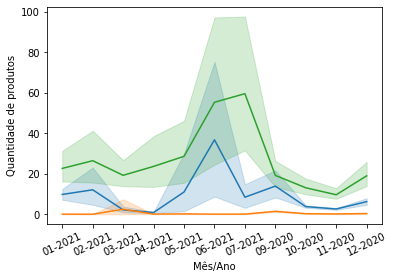

In [8]:

sns.lineplot(data=df_inicial, x="Mês/Ano", y="Entradas")

sns.lineplot(data=df_inicial, x="Mês/Ano", y="Saídas")

sns.lineplot(data=df_inicial, x="Mês/Ano", y="Estoque Final")
plt.ylabel("Quantidade de produtos")
plt.xticks(rotation = 25)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_inicial['Estoque Final'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_inicial['Estoque Final'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

<Figure size 1152x864 with 0 Axes>

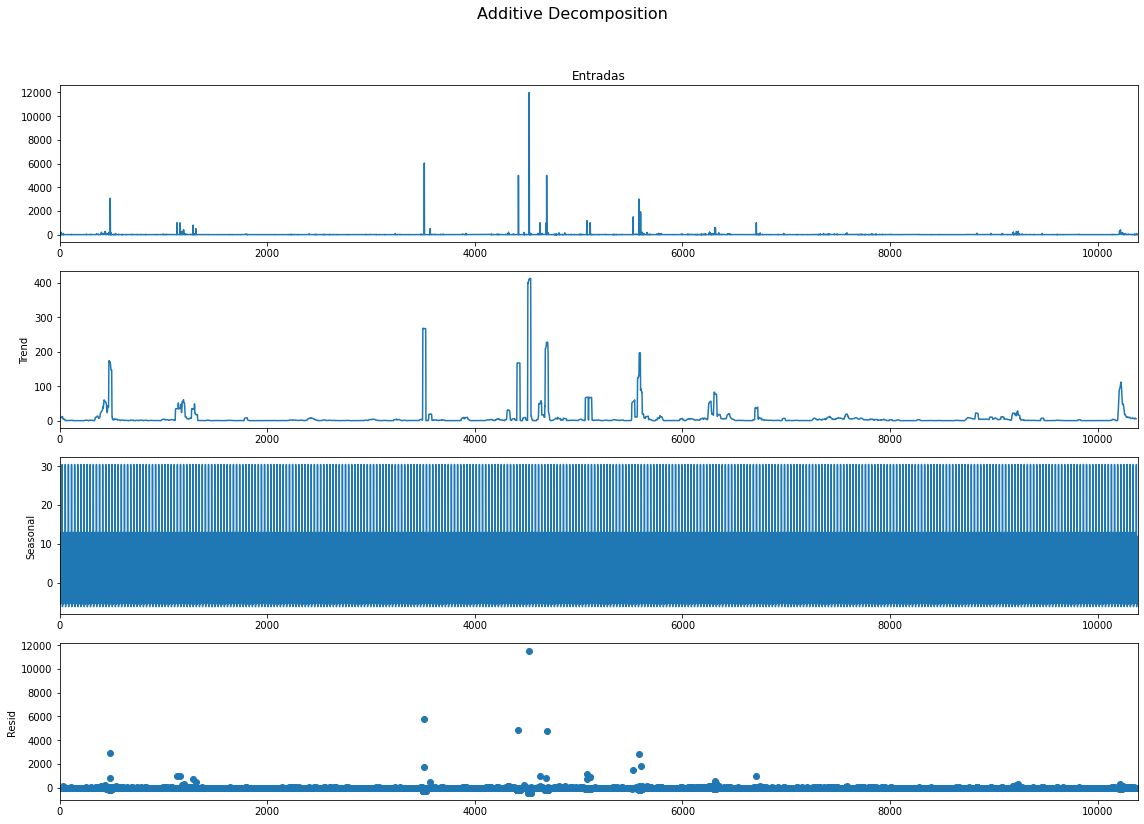

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
#multiplicative_decomposition = seasonal_decompose(df_inicial['Entradas'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_inicial['Entradas'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
#multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<Figure size 1152x864 with 0 Axes>

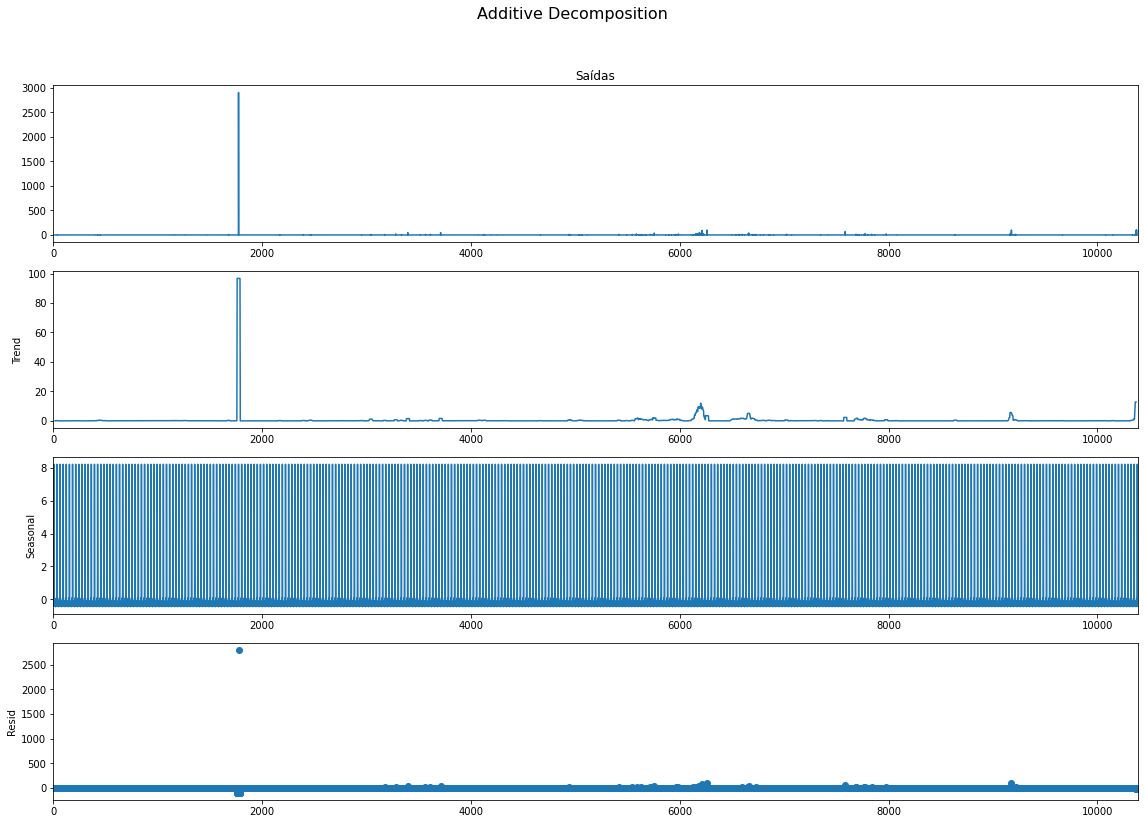

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
#multiplicative_decomposition = seasonal_decompose(df_inicial['Entradas'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_inicial['Saídas'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
#multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [21]:
>>> from statsmodels.tsa.seasonal import STL
>>> res = STL(df_inicial["Mês/Ano"]).fit()
>>> res.plot()
>>> plt.show()

ValueError: could not convert string to float: '01-2021'